In [1]:
import os
import binascii

In [2]:
filepath = os.getenv('suncet_data') + '/ancillary/snifs_csie_packets/CSIE_Telemetry_S_dark_20C_60s_2023_12_29.bin'

In [3]:
sync_word_hex = "1a cf fc 1d"
sync_word_bytes = bytes.fromhex(sync_word_hex.replace(" ", ""))

In [4]:
with open(filepath, 'rb') as file:
    file_content = file.read()

In [5]:
sync_word_length = len(sync_word_bytes)
positions = []
start = 0

while True:
    position = file_content.find(sync_word_bytes, start)
    if position == -1:
        break
    positions.append(position)
    start = position + sync_word_length

if positions:
    print(f"Sync word found at byte positions: {positions}")
else:
    print("Sync word not found in the file.")

Sync word found at byte positions: [3827485, 3829377, 3837585, 3845793, 3854001, 3862209, 3870417, 3878625, 3886833, 3895041, 3903249, 3911457, 3919665, 3927873, 3936081, 3944289, 3952497, 3960705, 3968913, 3977121, 3985329, 3993537, 4001745, 4009953, 4018161, 4026369, 4034577, 4042785, 4050993, 4059201, 4067409, 4075617, 4083825, 4092033, 4100241, 4108449, 4116657, 4124865, 4133073, 4141281, 4149489, 4157697, 4165905, 4174113, 4182321, 4190529, 4198737, 4206945, 4215153, 4223361, 4231569, 4239777, 4247985, 4256193, 4264401, 4272609, 4280817, 4289025, 4297233, 4305441, 4313649, 4321857, 4330065, 4338273, 4346481, 4354689, 4362897, 4371105, 4379313, 4387521, 4395729, 4403937, 4412145, 4420353, 4428561, 4436769, 4444977, 4453185, 4461393, 4469601, 4477809, 4486017, 4494225, 4502433, 4510641, 4518849, 4527057, 4535265, 4543473, 4551681, 4559889, 4568097, 4576305, 4584513, 4592721, 4600929, 4609137, 4617345, 4625553, 4633761, 4641969, 4650177, 4658385, 4666593, 4674801, 4683009, 4691217, 4

In [6]:
len(positions)

1026

In [7]:
def print_hex(bytes):
    hex_string_with_spaces = ' '.join(f'{byte:02x}' for byte in bytes)
    lines = [hex_string_with_spaces[i:i + 299] for i in range(0, len(hex_string_with_spaces), 300)]
    for line in lines:
        print(line)
    return

In [12]:
index = 500
packet = file_content[positions[index]:positions[index+1]]
print_hex(packet)

1a cf fc 1d 18 31 fc a2 20 05 00 00 00 00 01 f3 05 63 05 4c 05 de 05 c4 05 f4 05 a1 05 e4 06 ac 06 ac 05 a4 05 c4 05 b3 05 a4 05 80 05 c2 05 57 05 8e 05 f0 05 e1 05 a9 05 e2 06 17 05 a8 05 d8 06 d6 05 c8 06 ec 05 b9 05 84 05 2d 05 0b 05 14 05 13 05 34 05 59 05 57 05 98 07 3c 05 ba 06 45 05 72 05 6d
05 c6 05 91 05 93 05 a5 06 20 05 f5 09 39 05 7e 06 d1 06 d0 06 41 05 73 06 46 05 4e 06 12 05 9f 06 49 05 62 05 fe 05 74 05 7a 06 0d 05 6f 05 ba 05 ac 05 f8 05 b4 05 af 05 9b 06 2f 05 80 05 4e 05 a0 05 9e 05 53 05 77 05 64 06 01 05 bf 05 44 05 6a 05 57 05 4b 05 41 05 57 05 bb 05 36 05 20 05 47 04 f8
05 67 05 d0 05 18 05 1f 04 e8 04 f4 05 9e 05 44 05 9a 05 13 05 10 05 5f 05 ce 05 64 05 17 05 a5 05 2a 05 8d 05 21 05 18 05 7c 05 2f 05 8e 05 97 05 c6 06 d3 04 e5 04 e2 05 ba 05 57 05 47 06 14 05 5e 07 12 05 30 05 44 05 5b 05 31 04 f1 04 cc 04 ba 04 d5 04 ee 04 ab 04 d5 05 bb 04 d5 05 79 05 0e 05 62
04 e9 05 4e 05 6c 04 f2 05 b4 04 ce 04 fd 05 08 05 37 05 32 05 a8 04 fe 05 11 09 29 05 00 05 18 04 f

CCSDS definition is to have the first 6 bytes as primary header and next 6 bytes as secondary header


 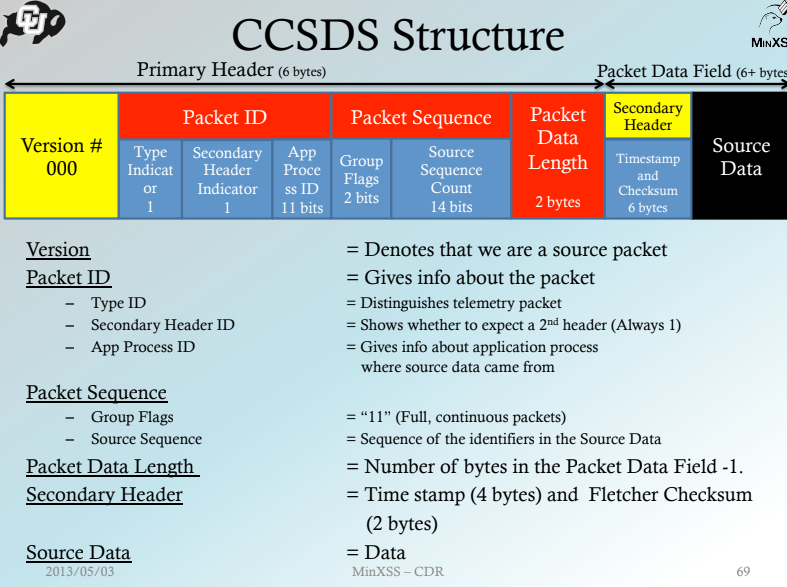

In [27]:
ccsds_primary_header = packet[0:6]
ccsds_secondary_header = packet[6:12]

In [28]:
print_hex(ccsds_primary_header)

1a cf fc 1d 18 31


In [29]:
print_hex(ccsds_secondary_header)

fc a2 20 05 00 00


In [34]:
def parse_ccsds_primary_header(header):
    # Unpack the first 2 bytes
    version = (header[0] & 0xE0) >> 5
    packet_type = (header[0] & 0x10) >> 4
    secondary_header_flag = (header[0] & 0x08) >> 3
    apid = ((header[0] & 0x07) << 8) | header[1]
    
    # Unpack the next 2 bytes
    sequence_flags = (header[2] & 0xC0) >> 6
    sequence_count = ((header[2] & 0x3F) << 8) | header[3]
    
    # Unpack the last 2 bytes
    packet_length = (header[4] << 8) | header[5]
    
    return {
        "version": version,
        "packet_type": packet_type,
        "secondary_header_flag": secondary_header_flag,
        "apid": apid,
        "sequence_flags": sequence_flags,
        "sequence_count": sequence_count,
        "packet_length": packet_length
    }

def parse_ccsds_secondary_header(header):
    if len(header) != 6:
        raise ValueError("Secondary header must be exactly 6 bytes long.")

    # Extract the timestamp (32-bit integer, usually split across the first 4 bytes)
    timestamp = (header[0] << 24) | (header[1] << 16) | (header[2] << 8) | header[3]
    
    # Extract the flags (assuming each bit in this byte represents a different flag)
    flags = header[4]
    flag1 = (flags & 0x80) >> 7  # Most significant bit (MSB)
    flag2 = (flags & 0x40) >> 6
    flag3 = (flags & 0x20) >> 5
    flag4 = (flags & 0x10) >> 4
    flag5 = (flags & 0x08) >> 3
    flag6 = (flags & 0x04) >> 2
    flag7 = (flags & 0x02) >> 1
    flag8 = (flags & 0x01)       # Least significant bit (LSB)
    
    # Extract the checksum/status byte (8-bit)
    checksum = header[5]
    
    return {
        "timestamp": timestamp,
        "flags": {
            "flag1": flag1,
            "flag2": flag2,
            "flag3": flag3,
            "flag4": flag4,
            "flag5": flag5,
            "flag6": flag6,
            "flag7": flag7,
            "flag8": flag8,
        },
        "checksum": checksum
    }


In [35]:
parsed_primary_header = parse_ccsds_primary_header(ccsds_primary_header)
print(parsed_primary_header)

{'version': 0, 'packet_type': 1, 'secondary_header_flag': 1, 'apid': 719, 'sequence_flags': 3, 'sequence_count': 15389, 'packet_length': 6193}


In [36]:
parsed_secondary_header = parse_ccsds_secondary_header(ccsds_secondary_header)
print(parsed_secondary_header)

{'timestamp': 4238483461, 'flags': {'flag1': 0, 'flag2': 0, 'flag3': 0, 'flag4': 0, 'flag5': 0, 'flag6': 0, 'flag7': 0, 'flag8': 0}, 'checksum': 0}


In [31]:
import pandas as pd

path = '/Users/masonjp2/Dropbox/minxss_dropbox/data/fm1/level0c/'
adcs1_csv_file_path = path + 'minxss1_l0c_adcs1_latest.csv'
hk_csv_file_path = path + 'minxss1_l0c_hk_latest.csv'
merged_hdf5_file_path = path + 'minxss1_l0c_merged_latest.h5'

In [19]:
df1 = pd.read_csv(adcs1_csv_file_path)
df2 = pd.read_csv(hk_csv_file_path)

In [20]:
df1.set_index('TIME_ISO', inplace=True)
df2.set_index('TIME_ISO', inplace=True)
df1.index = pd.to_datetime(df1.index)
df2.index = pd.to_datetime(df2.index)

In [21]:
df1

,APID,SEQ_FLAG,SEQ_COUNT,DATA_LENGTH,TIME,CDH_INFO,ADCS_INFO,ADCS_GROUP,SPAREBYTE,CHECKBYTES,...,ATMOSPHERIC_DENSITY,REFS_VALID,RUN_LOW_RATE_TASK,ATTITUDE_QUATERNION1,ATTITUDE_QUATERNION2,ATTITUDE_QUATERNION3,ATTITUDE_QUATERNION4,ATTITUDE_FILTER_RESIDUAL1,TIME_JD,TIME_HUMAN
TIME_ISO,,,,,,,,,,,,,,,,,,,,,
2016-05-19 05:53:07+00:00,38,3,16067,214,1.147672e+09,154,134,0,0,16893,...,0.0,0,0,-0.823337,0.316672,0.013189,0.470808,-0.000019,2.457528e+06,2016-05-19 05:53:07
2016-05-19 05:53:12+00:00,38,3,16072,214,1.147672e+09,154,134,0,0,43247,...,0.0,0,0,-0.795436,0.395939,0.051360,0.455934,-0.000019,2.457528e+06,2016-05-19 05:53:12
2016-05-19 05:53:57+00:00,38,3,16117,214,1.147672e+09,154,134,0,0,51550,...,0.0,0,0,-0.249366,0.867651,0.364538,0.228276,-0.000019,2.457528e+06,2016-05-19 05:53:57
2016-05-20 11:26:27+00:00,38,3,7734,214,1.147779e+09,2,210,0,0,39682,...,0.0,0,0,-0.593530,-0.510307,0.172162,0.598055,-0.000039,2.457529e+06,2016-05-20 11:26:27
2016-05-20 11:26:32+00:00,38,3,7739,214,1.147779e+09,2,210,0,0,16411,...,0.0,0,0,-0.590557,-0.509621,0.174571,0.600878,-0.000039,2.457529e+06,2016-05-20 11:26:32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-05 16:01:37+00:00,38,3,5663,214,1.178035e+09,2,182,0,0,17200,...,0.0,0,0,-0.675780,-0.724712,-0.119204,0.062481,0.000052,2.457879e+06,2017-05-05 16:01:37
2017-05-05 16:01:42+00:00,38,3,5668,214,1.178035e+09,2,182,0,0,11148,...,0.0,0,0,-0.525224,-0.667284,-0.403751,0.340378,0.000052,2.457879e+06,2017-05-05 16:01:42
2017-05-05 16:02:17+00:00,38,3,5703,214,1.178035e+09,2,182,0,0,11958,...,0.0,0,0,0.261750,0.906673,0.300472,0.138371,0.000052,2.457879e+06,2017-05-05 16:02:17


In [22]:
df = pd.concat([df1, df2])
df = df.sort_index()

In [23]:
df

,APID,SEQ_FLAG,SEQ_COUNT,DATA_LENGTH,TIME,CDH_INFO,ADCS_INFO,ADCS_GROUP,SPAREBYTE,CHECKBYTES,...,XACT_WHEEL3MEASSPEED,XACT_BODYFRAMERATEX,XACT_BODYFRAMERATEY,XACT_BODYFRAMERATEZ,XACT_LVL0_BITFLAGS,XACT_LVL0_COUNTER,XACT_LVL0_CMDREJECTCOUNT,XACT_LVL0_CMDACCEPTCOUNT,CHECKBYTES_CALCULATED,CHECKBYTES_VALID
TIME_ISO,,,,,,,,,,,,,,,,,,,,,
2016-05-16 10:06:54+00:00,25,3,1223,248,1.147428e+09,146,214,NaN,NaN,46667,...,2.975,0.000819,-0.000328,0.000164,7.0,219.0,0.0,0.0,46667.0,1.0
2016-05-16 10:07:21+00:00,25,3,1232,248,1.147428e+09,146,214,NaN,NaN,22014,...,3.050,0.000655,-0.000164,-0.000164,7.0,246.0,0.0,0.0,22014.0,1.0
2016-05-16 10:07:30+00:00,25,3,1235,248,1.147428e+09,146,214,NaN,NaN,22569,...,3.100,0.000655,0.000000,0.000328,7.0,255.0,0.0,0.0,22569.0,1.0
2016-05-16 10:07:48+00:00,25,3,1241,248,1.147428e+09,146,214,NaN,NaN,44776,...,2.750,0.000819,-0.000164,-0.000328,7.0,17.0,0.0,0.0,44776.0,1.0
2016-05-16 10:07:57+00:00,25,3,1244,248,1.147428e+09,146,214,NaN,NaN,45135,...,2.650,0.000655,0.000000,-0.000164,7.0,26.0,0.0,0.0,45135.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-05-06 02:36:26+00:00,25,3,1534,248,1.178073e+09,1,0,NaN,NaN,5098,...,0.000,0.110756,-0.078971,-0.096666,7.0,36.0,0.0,0.0,5098.0,1.0
2017-05-06 02:36:53+00:00,25,3,1543,248,1.178073e+09,1,0,NaN,NaN,37878,...,0.000,0.067502,-0.118129,-0.091259,7.0,33.0,0.0,0.0,37878.0,1.0
2017-05-06 02:37:02+00:00,25,3,1546,248,1.178073e+09,1,0,NaN,NaN,1010,...,0.000,0.110756,-0.078971,-0.096666,7.0,36.0,0.0,0.0,1010.0,1.0


In [29]:
df_interpolated = df.interpolate(method='time')

In [32]:
df_interpolated.to_hdf(merged_hdf5_file_path, key='data', mode='w', format='table', complevel=1, complib='blosc')

